In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
!wget --no-check-certificate 'https://docs.google.com/spreadsheets/d/1MW6OVwsKdqwDxueMToyy_iBQeqDILyj9/export?format=xlsx' -O ViceVirtual_Data.xlsx

--2024-05-17 06:04:54--  https://docs.google.com/spreadsheets/d/1MW6OVwsKdqwDxueMToyy_iBQeqDILyj9/export?format=xlsx
Resolving docs.google.com (docs.google.com)... 173.194.194.101, 173.194.194.139, 173.194.194.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.194.101|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0s-34-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/f8sspki5cnd6u0g5fdoe59frqo/1715925890000/102244963013105044552/*/1MW6OVwsKdqwDxueMToyy_iBQeqDILyj9?format=xlsx [following]
--2024-05-17 06:04:54--  https://doc-0s-34-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/f8sspki5cnd6u0g5fdoe59frqo/1715925890000/102244963013105044552/*/1MW6OVwsKdqwDxueMToyy_iBQeqDILyj9?format=xlsx
Resolving doc-0s-34-sheets.googleusercontent.com (doc-0s-34-sheets.googleusercontent.com)... 108.177.121.132, 2607:f8b0:4001:c19::84
Connecting to doc-0s-34-sheets.googleusercontent.com (doc-0s-34-sheets.

In [23]:
df = pd.read_excel('ViceVirtual_Data.xlsx')
df = df.rename(columns={'g': 'age'})
df = df[['age','gender','income', 'spent']]
df

,age,gender,income,spent
0,25,1,50000,20000
1,39,2,100000,35000
2,32,1,75000,25000
3,36,1,240000,60000
4,36,2,60000,20000
...,...,...,...,...
395,50,3,100000,30000
396,45,2,120000,35000
397,32,1,50000,15000
398,34,2,65000,15000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     400 non-null    int64
 1   gender  400 non-null    int64
 2   income  400 non-null    int64
 3   spent   400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [25]:
df.describe()

,age,gender,income,spent
count,400.000000,400.00000,400.000000,400.000000
mean,40.035000,1.66750,86350.000000,33780.000000
std,10.076339,0.64652,46318.635991,28773.100777
min,23.000000,1.00000,45000.000000,15000.000000
25%,32.000000,1.00000,50000.000000,20000.000000
50%,36.000000,2.00000,75000.000000,25000.000000
75%,47.000000,2.00000,100000.000000,35000.000000
max,65.000000,3.00000,240000.000000,150000.000000


In [26]:
df.columns

Index(['age', 'gender', 'income', 'spent'], dtype='object')

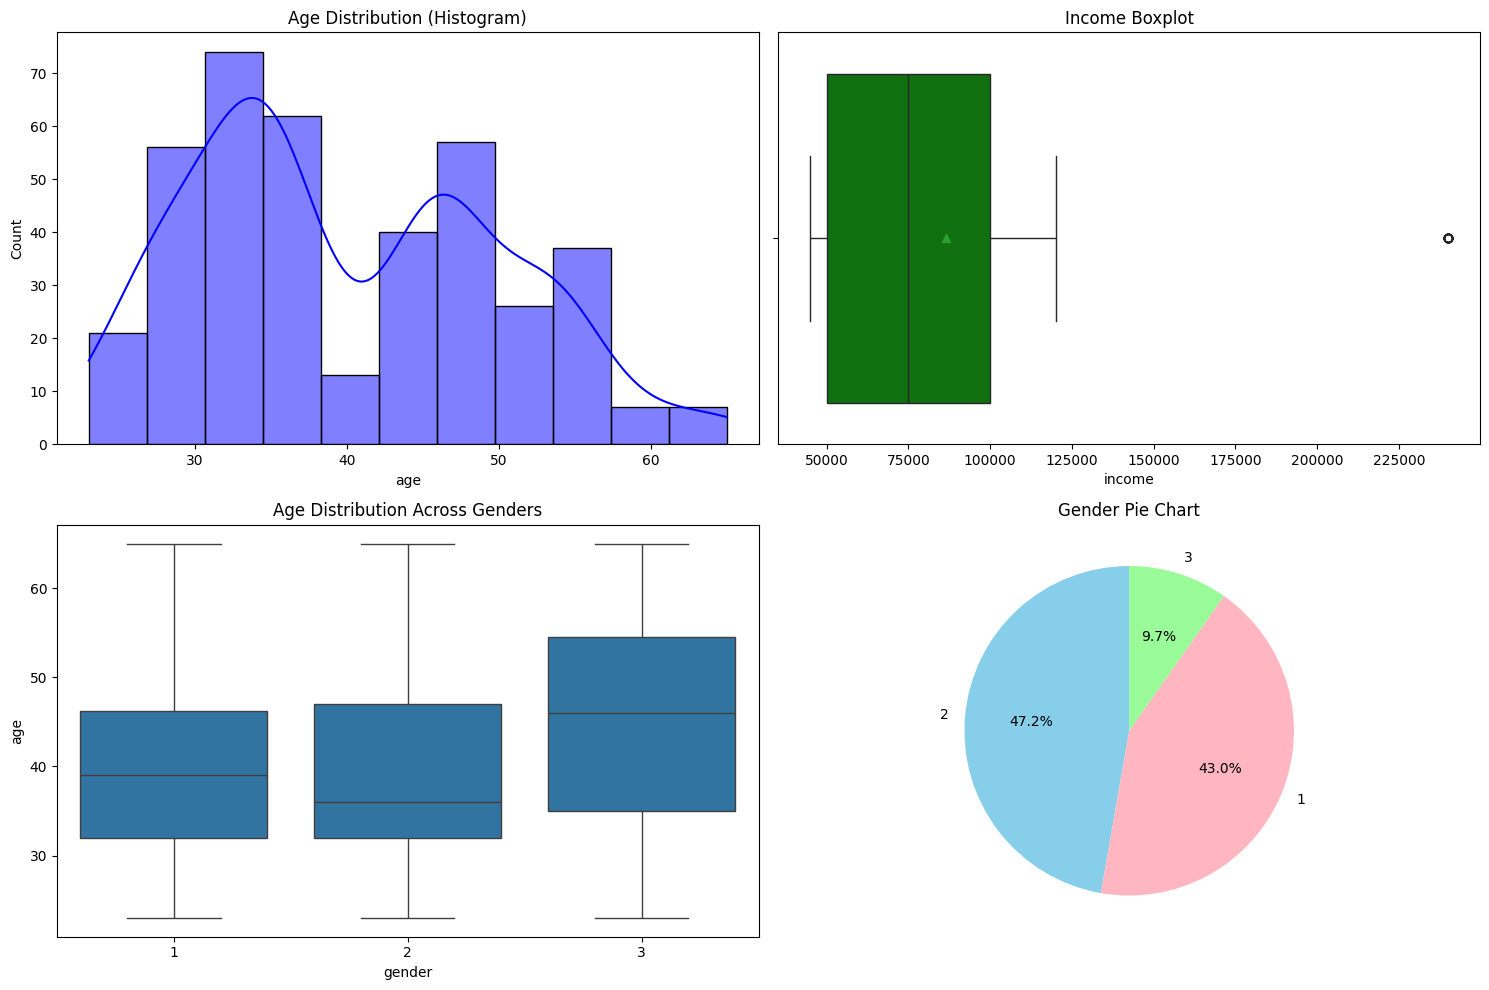

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.histplot(df['age'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution (Histogram)')

sns.boxplot(x=df['income'], color='green', showmeans=True, ax=axes[0, 1])
axes[0, 1].set_title('Income Boxplot')

sns.boxplot(x='gender', y='age', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution Across Genders')

gender_counts = df['gender'].value_counts()
axes[1, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink', 'palegreen'])
axes[1, 1].set_title('Gender Pie Chart')

plt.tight_layout()
plt.show()

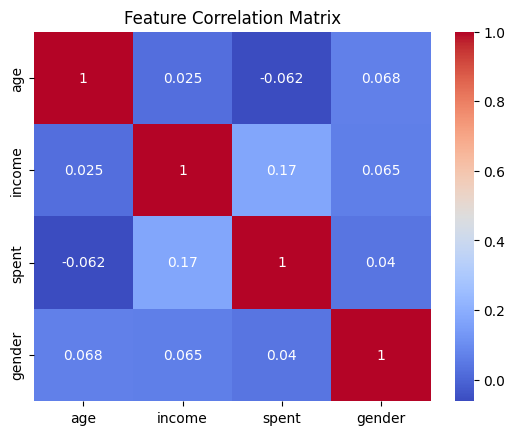

In [28]:
corr_matrix = df[['age', 'income', 'spent', 'gender']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

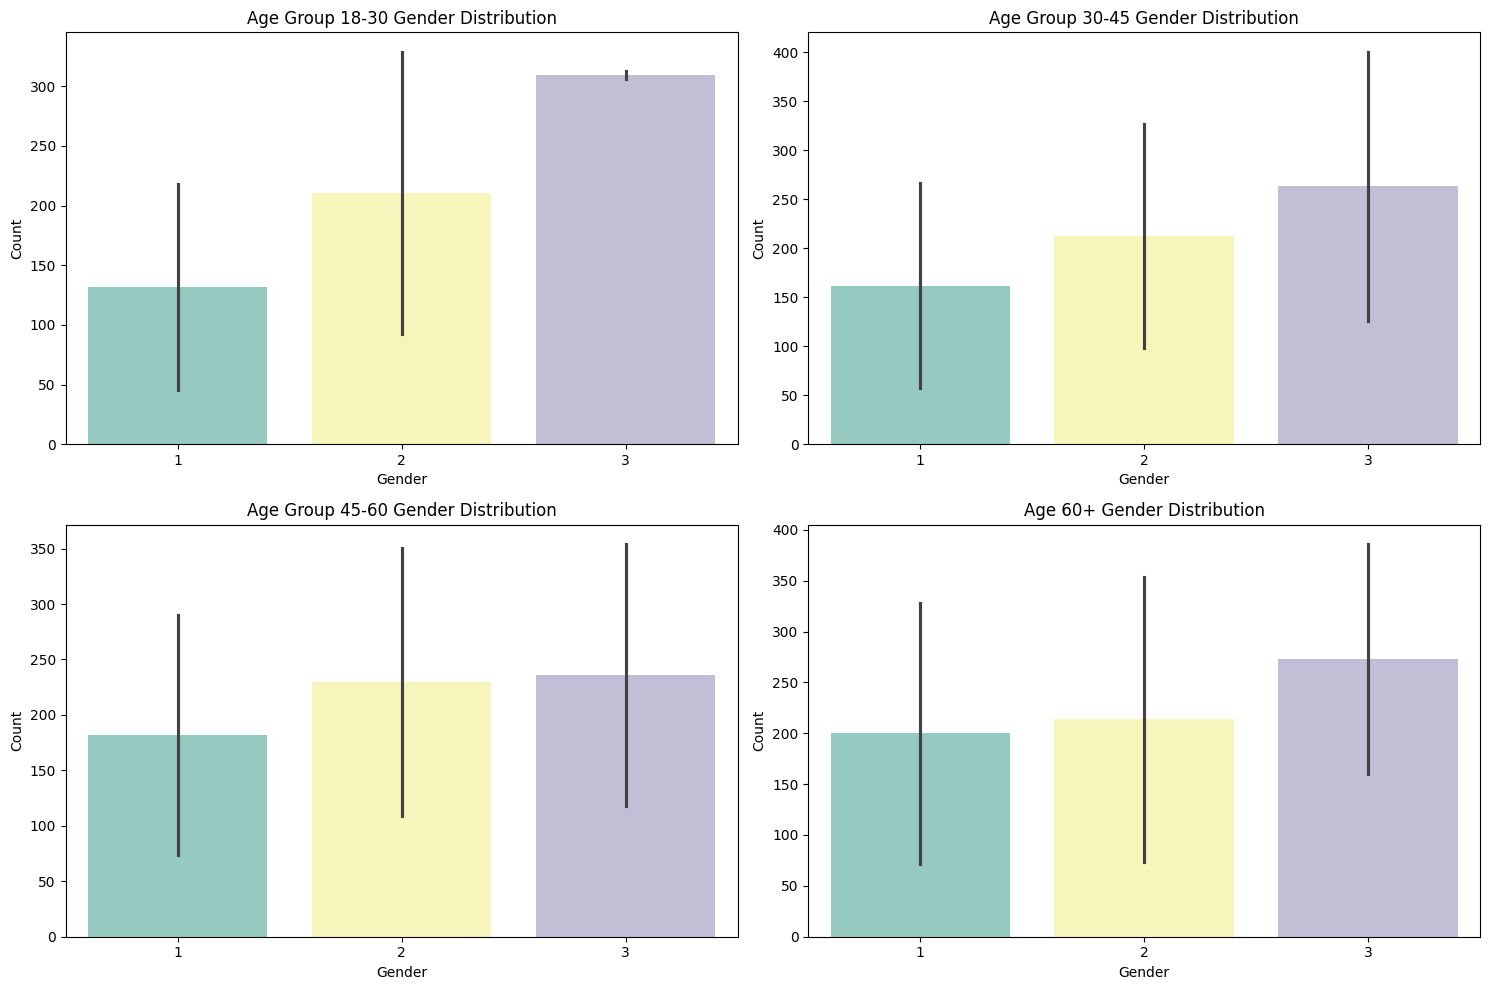

In [29]:
age_groups = [18, 30, 45, 60, np.inf]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (lower_bound, upper_bound) in enumerate(zip(age_groups[:-1], age_groups[1:])):
    if upper_bound is np.inf:
        # Special case for 60+
        gender_grouped = df[df['age'] >= lower_bound]
        age_label = f'Age 60+'
    else:
        gender_grouped = df[(df['age'] >= lower_bound) & (df['age'] < upper_bound)]
        age_label = f'Age Group {lower_bound}-{upper_bound}'

    row = i // 2
    col = i % 2

    sns.barplot(x='gender', y=gender_grouped.index, data=gender_grouped, hue='gender', palette='Set3',
                errorbar='sd', ax=axes[row, col], legend=False)
    axes[row, col].set_title(f'{age_label} Gender Distribution')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_xlabel('Gender')

plt.tight_layout()
plt.show()

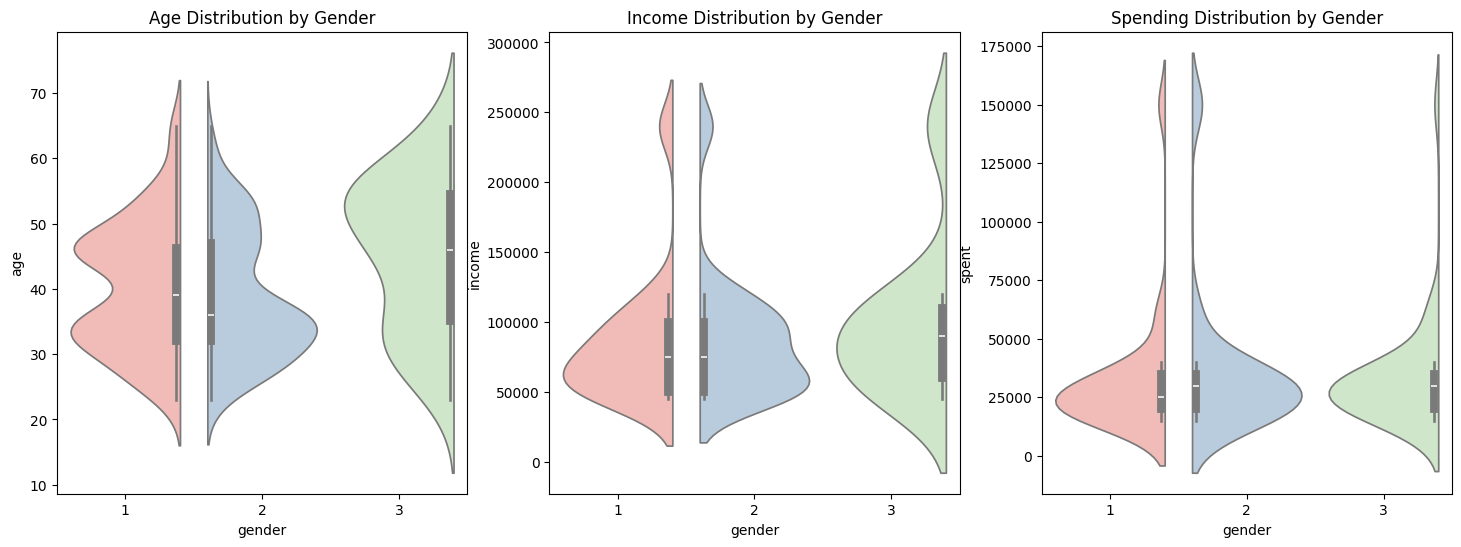

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# For age distribution by gender
sns.violinplot(x='gender', y='age', data=df, ax=ax[0], hue='gender', palette='Pastel1', split=True, legend=False)
ax[0].set_title('Age Distribution by Gender')

# For income distribution by gender
sns.violinplot(x='gender', y='income', data=df, ax=ax[1], hue='gender', palette='Pastel1', split=True, legend=False)
ax[1].set_title('Income Distribution by Gender')

# For spending distribution by gender
sns.violinplot(x='gender', y='spent', data=df, ax=ax[2], hue='gender', palette='Pastel1', split=True, legend=False)
ax[2].set_title('Spending Distribution by Gender')

plt.show()

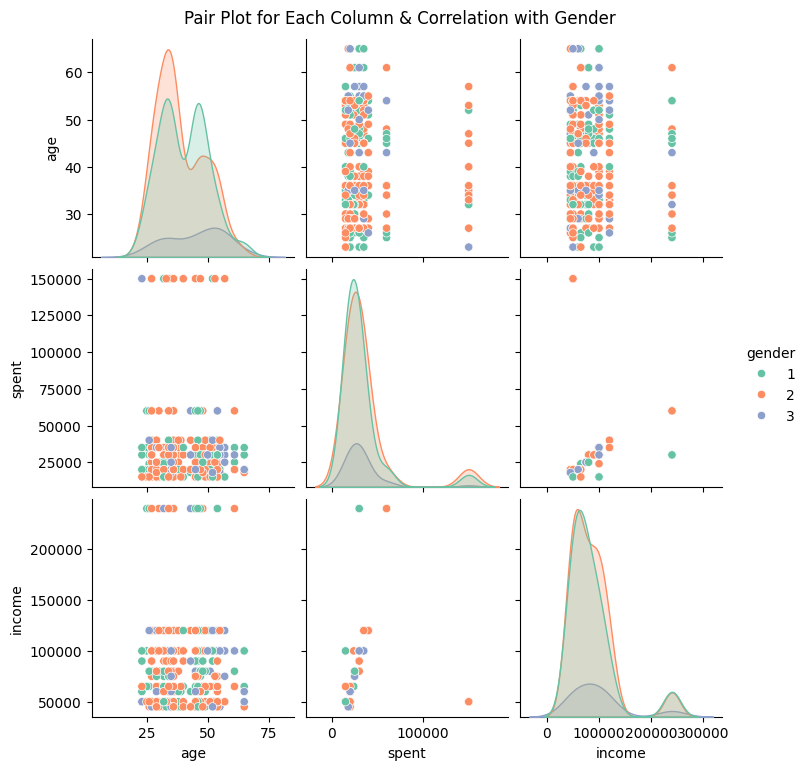

In [31]:
pair_plot = sns.pairplot(df[['age', 'spent', 'income', 'gender']], hue='gender', palette='Set2')
pair_plot.fig.suptitle('Pair Plot for Each Column & Correlation with Gender', y=1.02)
plt.show()

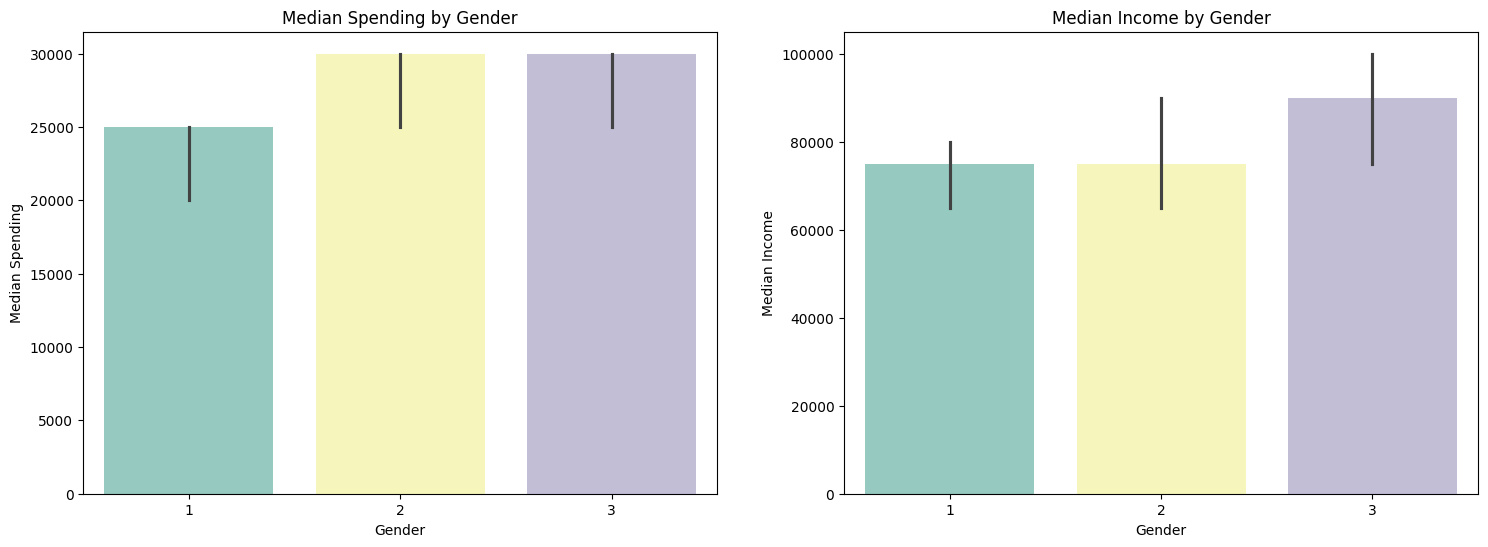

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# For Median Spending by Gender
sns.barplot(x='gender', y='spent', data=df, estimator=np.median, hue='gender', palette='Set3', ax=ax[0], legend=False)
ax[0].set_title('Median Spending by Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Median Spending')

# For Median Income by Gender
sns.barplot(x='gender', y='income', data=df, estimator=np.median, hue='gender', palette='Set3', ax=ax[1], legend=False)
ax[1].set_title('Median Income by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Median Income')

plt.show()